In [28]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel

In [29]:
# spark.read.csv
df = spark.read.csv('playtennis.csv', header = True) # 첫번째 줄은 칼럼

In [30]:
# csv -> spark DataFrame
# (데이터가 클 경우) 여러 블록에 나눠서 저장
# 다수에 블록이 동시에 실행하기 때문에 처리 속도가 매우 빠름
type(df)

pyspark.sql.dataframe.DataFrame

pyspark.sql.dataframe.DataFrame

In [31]:
# df 저장된 데이터 출력
df.show()

+--------+-----------+--------+------+----------+
| Outlook|Temperature|Humidity|  Wind|PlayTennis|
+--------+-----------+--------+------+----------+
|   Sunny|        Hot|    High|  Weak|        No|
|   Sunny|        Hot|    High|Strong|        No|
|Overcast|        Hot|    High|  Weak|       Yes|
|    Rain|       Mild|    High|  Weak|       Yes|
|    Rain|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Cool|  Normal|Strong|        No|
|Overcast|       Cool|  Normal|Strong|       Yes|
|   Sunny|       Mild|    High|  Weak|        No|
|   Sunny|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Mild|  Normal|  Weak|       Yes|
|   Sunny|       Mild|  Normal|Strong|       Yes|
|Overcast|       Mild|    High|Strong|       Yes|
|Overcast|        Hot|  Normal|  Weak|       Yes|
|    Rain|       Mild|    High|Strong|        No|
+--------+-----------+--------+------+----------+

+--------+-----------+--------+------+----------+
| Outlook|Temperature|Humidity|  Wind|PlayTennis|

줄들이 분산 저장되어있음

## Label Encoding()

In [32]:
from pyspark.sql import functions as F

In [33]:
#df.withColumn : 컬럼 데이터를 수정해서 리턴
# df.withColumn("Outlook", F.when(F.col("Outlook")=="Sunny",0): Outlook 컬럼값이 sunny이면 0으로 수정해서 리턴
# otherwise(F.col("Outlook") : 조건이 거짓이면 Outlook 컬럼의 기존 값 리턴

#df = df.withColumn("Outlook", F.when(F.col("Outlook")=="Sunny",0).otherwise(F.col("Outlook")))

In [34]:
#df = df.withColumn("PlayTennis", F.when(F.col("PlayTennis")=="Yes",1).otherwise(0))

In [35]:
# df[["Outlook","PlayTennis"]].show()

### Pandas를 이용하여 Label Encoding

In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [37]:
pdf = df.toPandas() #판다스 데이터 프레임 형식으로 변환

In [38]:
pdf

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [39]:
# 인코딩 한 라벨 값 확인
cols_encoded = ['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis']
le = LabelEncoder()


for col in cols_encoded:
    le.fit(pdf[col])
    new_col = '{}_encoded'.format(col)
    pdf[new_col] = le.transform(pdf[col] )
    print(col, "의 인코딩 정보입니다!")
    print(pdf.filter(regex = col).value_counts())
    print("-"*30)
    
# fit - Transform하는 형태
for col in cols_encoded:
    le.fit(pdf[col])
    pdf[col] = le.transform(pdf[col] )
    
pdf = pdf.drop(pdf.filter(regex = 'encoded'), axis =1)

Outlook 의 인코딩 정보입니다!
Outlook   Outlook_encoded
Sunny     2                  5
Rain      1                  5
Overcast  0                  4
dtype: int64
------------------------------
Temperature 의 인코딩 정보입니다!
Temperature  Temperature_encoded
Mild         2                      6
Hot          1                      4
Cool         0                      4
dtype: int64
------------------------------
Humidity 의 인코딩 정보입니다!
Humidity  Humidity_encoded
Normal    1                   7
High      0                   7
dtype: int64
------------------------------
Wind 의 인코딩 정보입니다!
Wind    Wind_encoded
Weak    1               8
Strong  0               6
dtype: int64
------------------------------
PlayTennis 의 인코딩 정보입니다!
PlayTennis  PlayTennis_encoded
Yes         1                     9
No          0                     5
dtype: int64
------------------------------
Outlook 의 인코딩 정보입니다!
Outlook   Outlook_encoded
Sunny     2                  5
Rain      1                  5
Overcast  0                 

In [40]:
df = spark.createDataFrame(pdf)

In [41]:
df.show()

+-------+-----------+--------+----+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|
+-------+-----------+--------+----+----------+
|      2|          1|       0|   1|         0|
|      2|          1|       0|   0|         0|
|      0|          1|       0|   1|         1|
|      1|          2|       0|   1|         1|
|      1|          0|       1|   1|         1|
|      1|          0|       1|   0|         0|
|      0|          0|       1|   0|         1|
|      2|          2|       0|   1|         0|
|      2|          0|       1|   1|         1|
|      1|          2|       1|   1|         1|
|      2|          2|       1|   0|         1|
|      0|          2|       0|   0|         1|
|      0|          1|       1|   1|         1|
|      1|          2|       0|   0|         0|
+-------+-----------+--------+----+----------+

+-------+-----------+--------+----+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|
+-------+-----------+--------+----+----------+
|      2|   

In [42]:
type(df)

pyspark.sql.dataframe.DataFrame

pyspark.sql.dataframe.DataFrame

In [43]:
df.schema

StructType(List(StructField(Outlook,LongType,true),StructField(Temperature,LongType,true),StructField(Humidity,LongType,true),StructField(Wind,LongType,true),StructField(PlayTennis,LongType,true)))

StructType(List(StructField(Outlook,LongType,true),StructField(Temperature,LongType,true),StructField(Humidity,LongType,true),StructField(Wind,LongType,true),StructField(PlayTennis,LongType,true)))

In [44]:
cols = ['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis']
for col in cols :
    df = df.withColumn(col,df[col].cast('int'))

In [45]:
df.schema

StructType(List(StructField(Outlook,IntegerType,true),StructField(Temperature,IntegerType,true),StructField(Humidity,IntegerType,true),StructField(Wind,IntegerType,true),StructField(PlayTennis,IntegerType,true)))

StructType(List(StructField(Outlook,IntegerType,true),StructField(Temperature,IntegerType,true),StructField(Humidity,IntegerType,true),StructField(Wind,IntegerType,true),StructField(PlayTennis,IntegerType,true)))

In [46]:
df.show()

+-------+-----------+--------+----+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|
+-------+-----------+--------+----+----------+
|      2|          1|       0|   1|         0|
|      2|          1|       0|   0|         0|
|      0|          1|       0|   1|         1|
|      1|          2|       0|   1|         1|
|      1|          0|       1|   1|         1|
|      1|          0|       1|   0|         0|
|      0|          0|       1|   0|         1|
|      2|          2|       0|   1|         0|
|      2|          0|       1|   1|         1|
|      1|          2|       1|   1|         1|
|      2|          2|       1|   0|         1|
|      0|          2|       0|   0|         1|
|      0|          1|       1|   1|         1|
|      1|          2|       0|   0|         0|
+-------+-----------+--------+----+----------+

+-------+-----------+--------+----+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|
+-------+-----------+--------+----+----------+
|      2|   

## VectorAssembler 
*  sparkdataframe에서는 데이터가 크면 데이터가 블록으로 분할됨(직접지정하지 않아도)
* 그래서 함수를 실행하여 진행하고, 블록에 동시에 동일한 함수를 실행함

### <span style ="color:red"> -> 동일한 레코드임에도 불구하고 독립 변수들이 각각 다른 블록에 나눠서 저장 될 수도 있음 </span>

### <span style ="color:bule">VectorAssenbler</span>을 사용하여 독립변수를 한컬럼에 저장함!

* 독립 변수들을 inputCols에 지정
* outputCol ="features" feature 변수에 독립변수를 벡터로 한 번에 저장

In [47]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols = ['Outlook', 'Temperature', 'Humidity', 'Wind'], outputCol = 'features')
assembler_df = assembler.transform(df)

In [48]:
assembler_df.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      2|          1|       0|   1|         0|[2.0,1.0,0.0,1.0]|
|      2|          1|       0|   0|         0|[2.0,1.0,0.0,0.0]|
|      0|          1|       0|   1|         1|[0.0,1.0,0.0,1.0]|
|      1|          2|       0|   1|         1|[1.0,2.0,0.0,1.0]|
|      1|          0|       1|   1|         1|[1.0,0.0,1.0,1.0]|
|      1|          0|       1|   0|         0|[1.0,0.0,1.0,0.0]|
|      0|          0|       1|   0|         1|    (4,[2],[1.0])|
|      2|          2|       0|   1|         0|[2.0,2.0,0.0,1.0]|
|      2|          0|       1|   1|         1|[2.0,0.0,1.0,1.0]|
|      1|          2|       1|   1|         1|[1.0,2.0,1.0,1.0]|
|      2|          2|       1|   0|         1|[2.0,2.0,1.0,0.0]|
|      0|          2|       0|   0|         1|    (4,[1],[2.0])|
|      0|          1|    

### Test/Train data set 분리

In [49]:
(trainingData, testData) = assembler_df.randomSplit([0.7,0.3])
trainingData.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      2|          1|       0|   0|         0|[2.0,1.0,0.0,0.0]|
|      1|          0|       1|   1|         1|[1.0,0.0,1.0,1.0]|
|      1|          0|       1|   0|         0|[1.0,0.0,1.0,0.0]|
|      2|          2|       0|   1|         0|[2.0,2.0,0.0,1.0]|
|      1|          2|       1|   1|         1|[1.0,2.0,1.0,1.0]|
|      0|          2|       0|   0|         1|    (4,[1],[2.0])|
|      2|          2|       1|   0|         1|[2.0,2.0,1.0,0.0]|
|      0|          1|       1|   1|         1|[0.0,1.0,1.0,1.0]|
|      1|          2|       0|   0|         0|[1.0,2.0,0.0,0.0]|
+-------+-----------+--------+----+----------+-----------------+

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+---

In [50]:
testData.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      2|          1|       0|   1|         0|[2.0,1.0,0.0,1.0]|
|      0|          1|       0|   1|         1|[0.0,1.0,0.0,1.0]|
|      1|          2|       0|   1|         1|[1.0,2.0,0.0,1.0]|
|      0|          0|       1|   0|         1|    (4,[2],[1.0])|
|      2|          0|       1|   1|         1|[2.0,0.0,1.0,1.0]|
+-------+-----------+--------+----+----------+-----------------+

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      2|          1|       0|   1|         0|[2.0,1.0,0.0,1.0]|
|      0|          1|       0|   1|         1|[0.0,1.0,0.0,1.0]|
|      1|          2|       0|   1|         1|[1.0,2.0,0.0,1.0]|
|      0|          0|   

종속 변수  = PlqyTennis

독립 변수 = features

## Spark를 이용한 Decision Tree

In [51]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'PlayTennis')

In [52]:
dt_model = dt.fit(trainingData)

In [53]:
# 모델 예측
prediction = dt_model.transform(testData)

In [54]:
prediction.show()

+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|rawPrediction|probability|prediction|
+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|      2|          1|       0|   1|         0|[2.0,1.0,0.0,1.0]|    [3.0,0.0]|  [1.0,0.0]|       0.0|
|      0|          1|       0|   1|         1|[0.0,1.0,0.0,1.0]|    [0.0,1.0]|  [0.0,1.0]|       1.0|
|      1|          2|       0|   1|         1|[1.0,2.0,0.0,1.0]|    [3.0,0.0]|  [1.0,0.0]|       0.0|
|      0|          0|       1|   0|         1|    (4,[2],[1.0])|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|      2|          0|       1|   1|         1|[2.0,0.0,1.0,1.0]|    [0.0,1.0]|  [0.0,1.0]|       1.0|
+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+

+-------+-----------+--------+----+----------+-----------------+-------------+---

Decision Tree 정확도 계산하기

In [55]:
# playTennis 칼럼과 예측 값이 같은 행 조회
right_pred = prediction.filter(prediction.PlayTennis == prediction.prediction)
right_pred.count()

3

3

In [56]:
right_pred.count()/prediction.count()

0.6

0.6

## 시각화하기

In [57]:
from dtreeviz import trees
from dtreeviz.models.spark_decision_tree import ShadowSparkTree

In [58]:
# Decision Tree의 내용 조회
print(dt_model.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_5856a451d2c6) of depth 3 with 9 nodes
  If (feature 2 <= 0.5)
   If (feature 0 <= 0.5)
    Predict: 1.0
   Else (feature 0 > 0.5)
    Predict: 0.0
  Else (feature 2 > 0.5)
   If (feature 1 <= 0.5)
    If (feature 3 <= 0.5)
     Predict: 0.0
    Else (feature 3 > 0.5)
     Predict: 1.0
   Else (feature 1 > 0.5)
    Predict: 1.0

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_5856a451d2c6) of depth 3 with 9 nodes
  If (feature 2 <= 0.5)
   If (feature 0 <= 0.5)
    Predict: 1.0
   Else (feature 0 > 0.5)
    Predict: 0.0
  Else (feature 2 > 0.5)
   If (feature 1 <= 0.5)
    If (feature 3 <= 0.5)
     Predict: 0.0
    Else (feature 3 > 0.5)
     Predict: 1.0
   Else (feature 1 > 0.5)
    Predict: 1.0



In [59]:
# 학습데이터 pandas 변환
dataset = df.toPandas()
dataset

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


,Outlook,Temperature,Humidity,Wind,PlayTennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [60]:
# DT의 출력 정보 설정
spark_dtree = ShadowSparkTree (
                                dt_model, # DT 객체
                                dataset[['Outlook', 'Temperature', 'Humidity', 'Wind']], #독립변수 데이터
                                dataset['PlayTennis'], #  종속변수 데이터
                                feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind'],
                                target_name = 'PlayTennis',
                                class_names = ['No', 'Yes']
)

In [61]:
spark_dtree

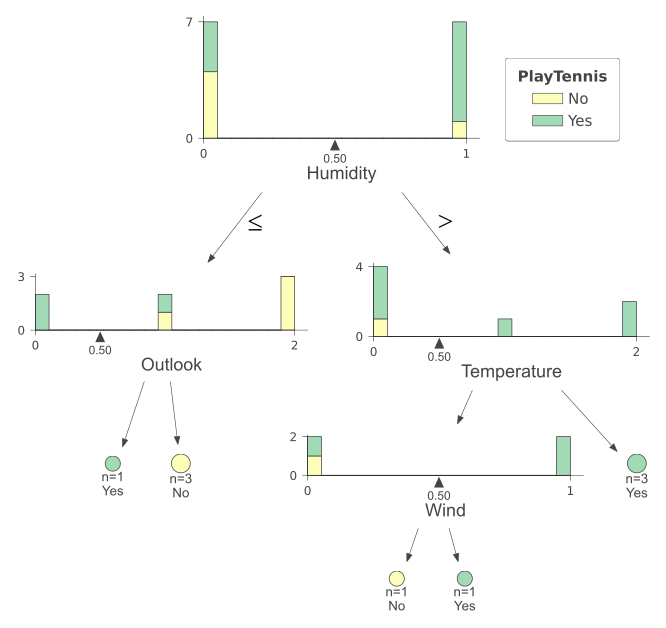

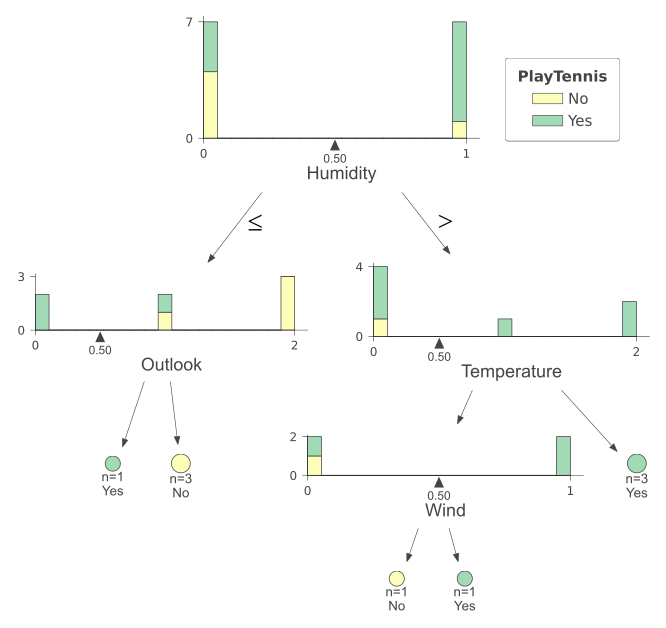

In [62]:
# Decision Tree 내용 시각화
trees.dtreeviz(spark_dtree, scale = 2.0)